
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## SWAN simulations

inputs required: 
  * Sea and swell selected cases from ***MDA***

in this notebook:
  * SWAN mesh descriptions
  * SWAN simulations for sea and swell conditions
  * Read and store SWAN output at the location of study


### Workflow:

<div>
    <img src="../resources/nb02_02.png" width="400px">
</div>




The SWAN model allows to simulate the wave propagation in nearshore areas (Booij et al., 1999). The design points from notebook 02_01 provide the boundary conditions for a series of simulations from the SWAN model. SWAN was run in stationary mode. Sea and Swell conditions have been simulated independently and summed linearly afterwards. 

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..', '..'))

# teslakit
from teslakit.database import Database, hyswan_db

# swan custom toolbox
from teslakit.numerical_models.swan.wrap import SwanProject, SwanWrap_STAT
from teslakit.numerical_models.swan.plots.stat import scatter_maps


In [2]:
# swan module needs SWAN serial executable, more information at teslakit README.md file

# This function will copy a compiled executable to our module:

#from teslakit.numerical_models import swan
#swan.set_swan_binary_file('swan.exe')



## Database and Site parameters

In [3]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/nico/Projects/TESLA-kit/TeslaKit/data'
db = Database(p_data)

# set site
db.SetSite('ROI')

# hyswan historical database
db_hist = hyswan_db(db.paths.site.HYSWAN.hist)



## SWAN: site files, main and nested grid descriptions

In [4]:
# SWAN site bathymetry files
p_swan = db.paths.site.HYSWAN.swan_site
p_swan_ext = op.join(p_swan, 'Roinamur_ext_bottom.dat')
p_swan_int = op.join(p_swan, 'Roinamur_int_bottom.dat')

# SWAN site shore (for plots)
p_shore = op.join(p_swan, 'shore.npy')
np_shore = np.load(p_shore)

# SWAN grids description
main_grid = {
    'xpc': 166.6159,  # x origin
    'ypc': 8.4105,    # y origin
    'alpc': 0,        # x-axis direction 
    'xlenc': 1.3722,  # grid length in x
    'ylenc': 1.175,   # grid length in y
    'mxc': 137,       # number mesh x
    'myc': 118,       # number mesh y
    'dxinp': 0.01,    # size mesh x
    'dyinp': 0.01,    # size mesh y
}

nested_grid = {
    'xpc': 167.4059,
    'ypc': 9.3505,
    'alpc': 0,
    'xlenc': 0.12,
    'ylenc': 0.08,
    'mxc': 120,
    'myc': 80,
    'dxinp': 0.001,
    'dyinp': 0.001,
}



## SWAN: HISTORICAL SEA waves 

In [5]:
# load Historical sea MDA subset
wvs_sea_subset = db_hist.Load('sea_subset')


# waves data hs and spr
wvs_sea_subset['hs'] = 1
wvs_sea_subset['spr'] = 40
wvs_sea_subset.rename(columns={'tp':'per'}, inplace=True)  # rename Tp for swan wrapper


# swan project
p_swan = db_hist.paths['swan_projects']
sp = SwanProject(p_swan, 'sea')

# main mesh: depth and computational grid 
sp.mesh_main.dg = main_grid.copy()
sp.mesh_main.cg = main_grid.copy()
sp.mesh_main.depth = np.loadtxt(p_swan_ext)

# nested mesh: depth and computational grid 
sp.mesh_nest1.dg = nested_grid.copy()
sp.mesh_nest1.cg = nested_grid.copy()
sp.mesh_nest1.depth = np.loadtxt(p_swan_int)

# activate nested mesh
sp.run_nest1 = True


# SWAN parameters 
sp.params = {
    'sea_level': 0,
    'jonswap_gamma': 3,
    'coords_spherical': 'CCM',
    'waves_period': 'PEAK',
    'nested_bounds': 'CLOSED',
}

    
# SWAN project wrapper
sw = SwanWrap_STAT(sp)

# build and launch cases
sw.build_cases(wvs_sea_subset)
sw.run_cases()


SWAN CASE: 0000 ---> hs    1.00, per   22.06, dir  127.25, spr   40.00
SWAN CASE: 0001 ---> hs    1.00, per    1.82, dir  307.97, spr   40.00
SWAN CASE: 0002 ---> hs    1.00, per    1.67, dir  128.21, spr   40.00
SWAN CASE: 0003 ---> hs    1.00, per   11.29, dir  217.20, spr   40.00
SWAN CASE: 0004 ---> hs    1.00, per   10.97, dir   34.19, spr   40.00
SWAN CASE: 0005 ---> hs    1.00, per   11.84, dir  124.94, spr   40.00
SWAN CASE: 0006 ---> hs    1.00, per    1.57, dir   50.06, spr   40.00
SWAN CASE: 0007 ---> hs    1.00, per    3.26, dir  232.04, spr   40.00
SWAN CASE: 0008 ---> hs    1.00, per    6.92, dir  169.39, spr   40.00
SWAN CASE: 0009 ---> hs    1.00, per    5.68, dir  357.26, spr   40.00
SWAN CASE: 0010 ---> hs    1.00, per   18.13, dir  172.51, spr   40.00
SWAN CASE: 0011 ---> hs    1.00, per    7.49, dir  280.52, spr   40.00
SWAN CASE: 0012 ---> hs    1.00, per    6.57, dir   91.91, spr   40.00
SWAN CASE: 0013 ---> hs    1.00, per   17.01, dir  107.88, spr   40.00
SWAN C

SWAN CASE: 0119 ---> hs    1.00, per   10.17, dir  184.00, spr   40.00
SWAN CASE: 0120 ---> hs    1.00, per    6.21, dir  137.68, spr   40.00
SWAN CASE: 0121 ---> hs    1.00, per   15.98, dir  115.63, spr   40.00
SWAN CASE: 0122 ---> hs    1.00, per   13.00, dir  130.81, spr   40.00
SWAN CASE: 0123 ---> hs    1.00, per   19.76, dir  138.74, spr   40.00
SWAN CASE: 0124 ---> hs    1.00, per   20.93, dir  114.15, spr   40.00
SWAN CASE: 0000 SOLVED
SWAN CASE: 0001 SOLVED
SWAN CASE: 0002 SOLVED
SWAN CASE: 0003 SOLVED
SWAN CASE: 0004 SOLVED
SWAN CASE: 0005 SOLVED
SWAN CASE: 0006 SOLVED
SWAN CASE: 0007 SOLVED
SWAN CASE: 0008 SOLVED
SWAN CASE: 0009 SOLVED
SWAN CASE: 0010 SOLVED
SWAN CASE: 0011 SOLVED
SWAN CASE: 0012 SOLVED
SWAN CASE: 0013 SOLVED
SWAN CASE: 0014 SOLVED
SWAN CASE: 0015 SOLVED
SWAN CASE: 0016 SOLVED
SWAN CASE: 0017 SOLVED
SWAN CASE: 0018 SOLVED
SWAN CASE: 0019 SOLVED
SWAN CASE: 0020 SOLVED
SWAN CASE: 0021 SOLVED
SWAN CASE: 0022 SOLVED
SWAN CASE: 0023 SOLVED
SWAN CASE: 0024 SOLVED

<xarray.Dataset>
Dimensions:  (case: 125, lat: 118, lon: 137)
Coordinates:
  * lat      (lat) float64 8.411 8.42 8.43 8.44 8.45 ... 9.546 9.556 9.566 9.576
  * lon      (lon) float64 166.6 166.6 166.6 166.6 ... 167.9 168.0 168.0 168.0
Dimensions without coordinates: case
Data variables:
    Hsig     (case, lon, lat) float32 0.9640554 0.96351606 ... 1.0097145
    Tm02     (case, lon, lat) float32 16.898996 16.896381 ... 16.139425
    Dir      (case, lon, lat) float32 130.82195 130.89825 ... 115.76016
    Dspr     (case, lon, lat) float32 35.599056 35.53772 ... 39.616814 39.56756
    TPsmoo   (case, lon, lat) float32 21.628626 21.62843 ... 20.970388 20.970345


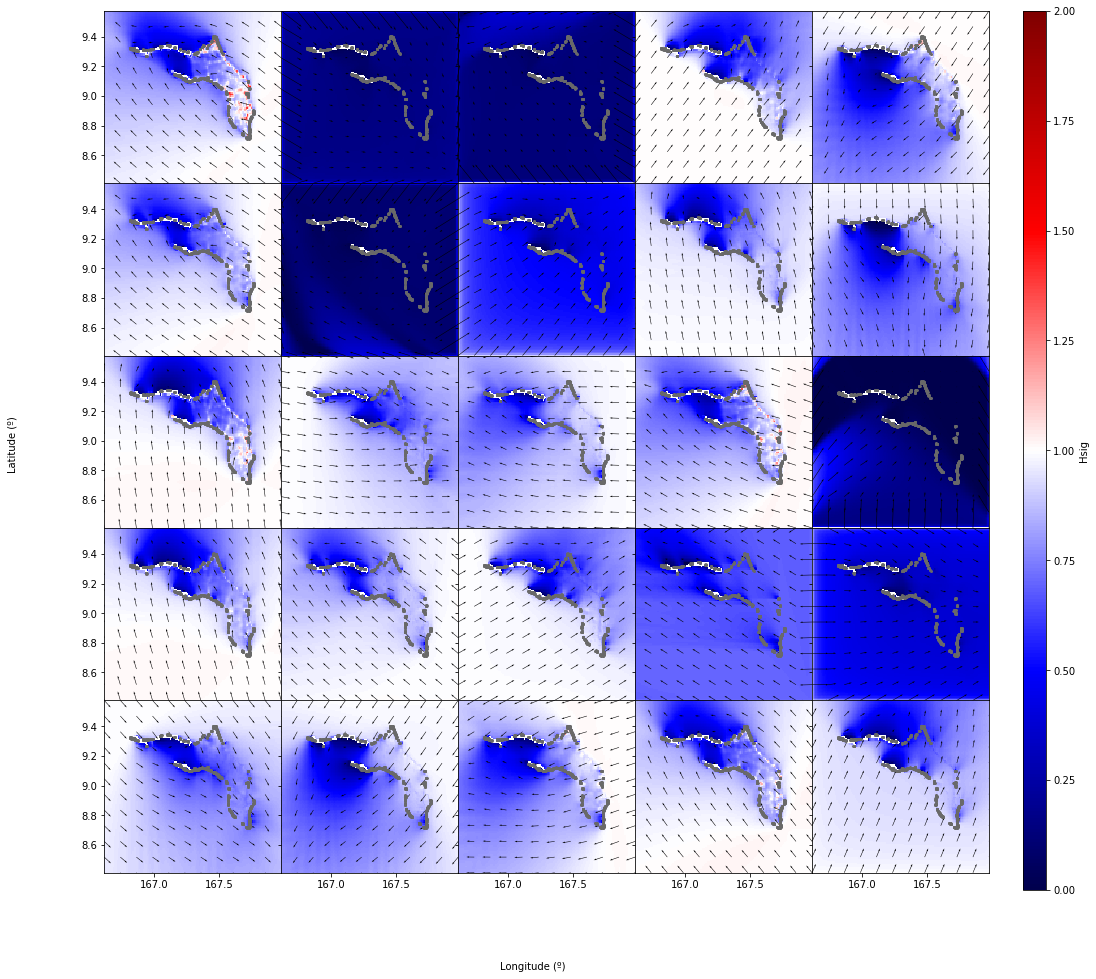

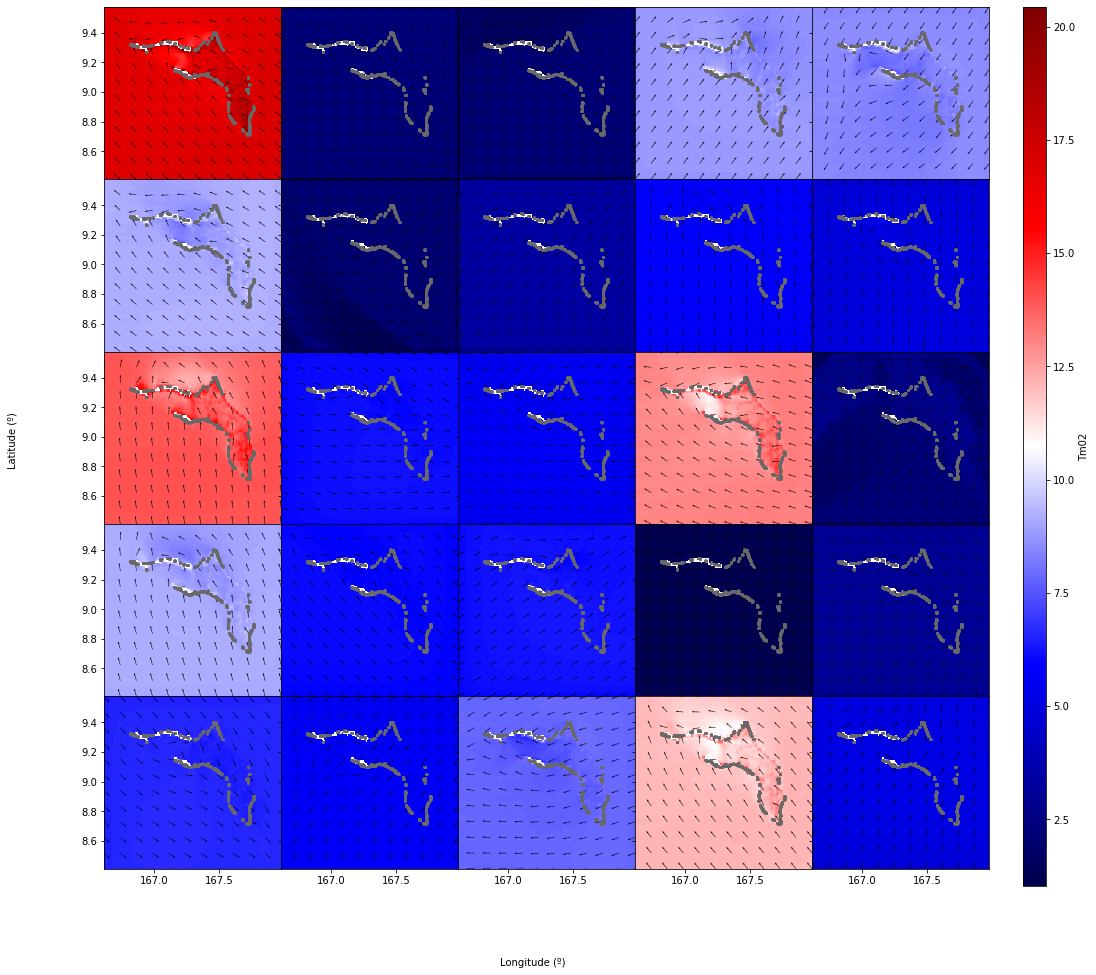

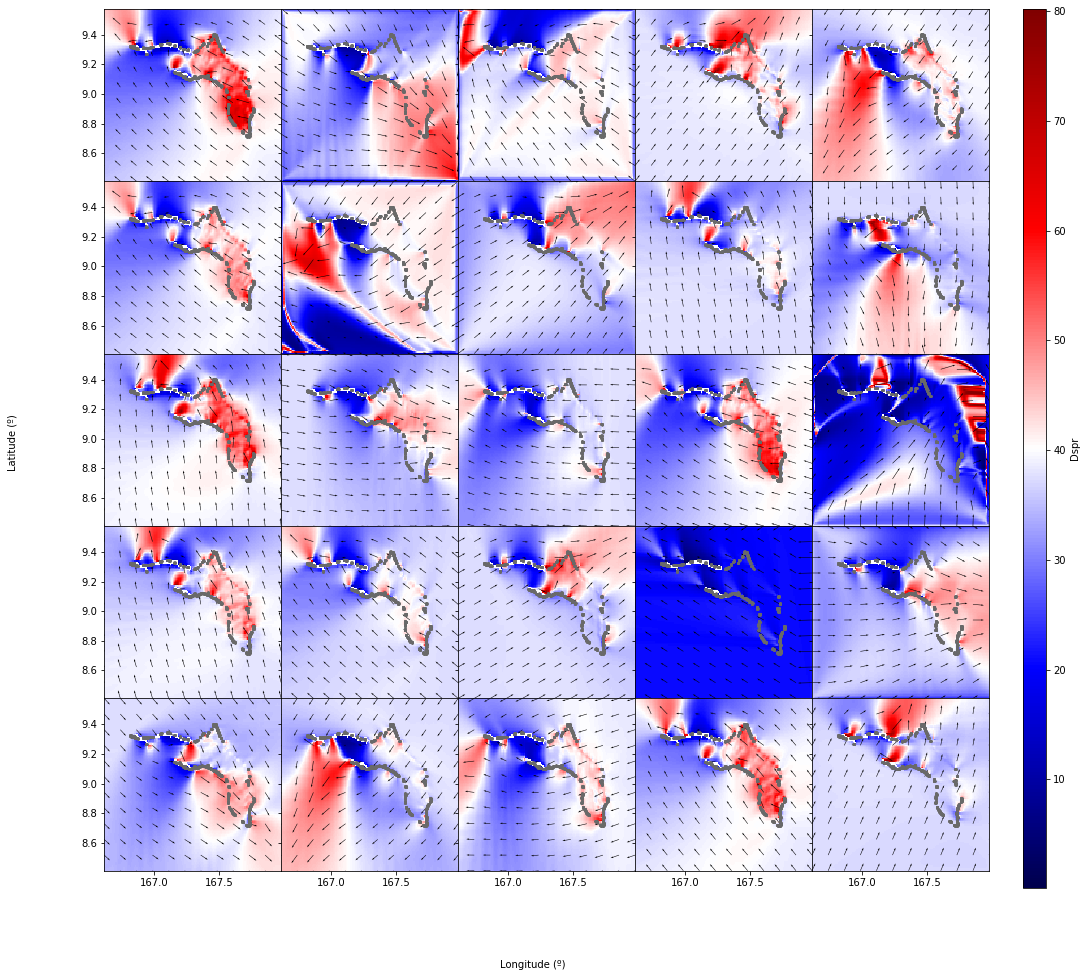

In [6]:
# extract output for main mesh
out_sea_mm_hist = sw.extract_output()
out_sea_mm_hist.to_netcdf(op.join(p_swan, 'out_main_sea.nc'))
print(out_sea_mm_hist)

# plot scatter maps
scatter_maps(out_sea_mm_hist, n_cases=25, var_limits={'Hsig':(0,2)}, np_shore=np_shore);


<xarray.Dataset>
Dimensions:  (case: 125, lat: 80, lon: 120)
Coordinates:
  * lat      (lat) float64 9.351 9.351 9.353 9.354 ... 9.427 9.428 9.429 9.43
  * lon      (lon) float64 167.4 167.4 167.4 167.4 ... 167.5 167.5 167.5 167.5
Dimensions without coordinates: case
Data variables:
    Hsig     (case, lon, lat) float32 0.5193764 0.4594521 ... 0.08600492
    Tm02     (case, lon, lat) float32 16.526276 15.746195 ... 16.0186 13.667585
    Dir      (case, lon, lat) float32 102.454315 103.283936 ... 201.76588
    Dspr     (case, lon, lat) float32 44.17859 47.127365 ... 31.260159 17.058607
    TPsmoo   (case, lon, lat) float32 21.495134 21.46257 ... 20.75479 20.548864


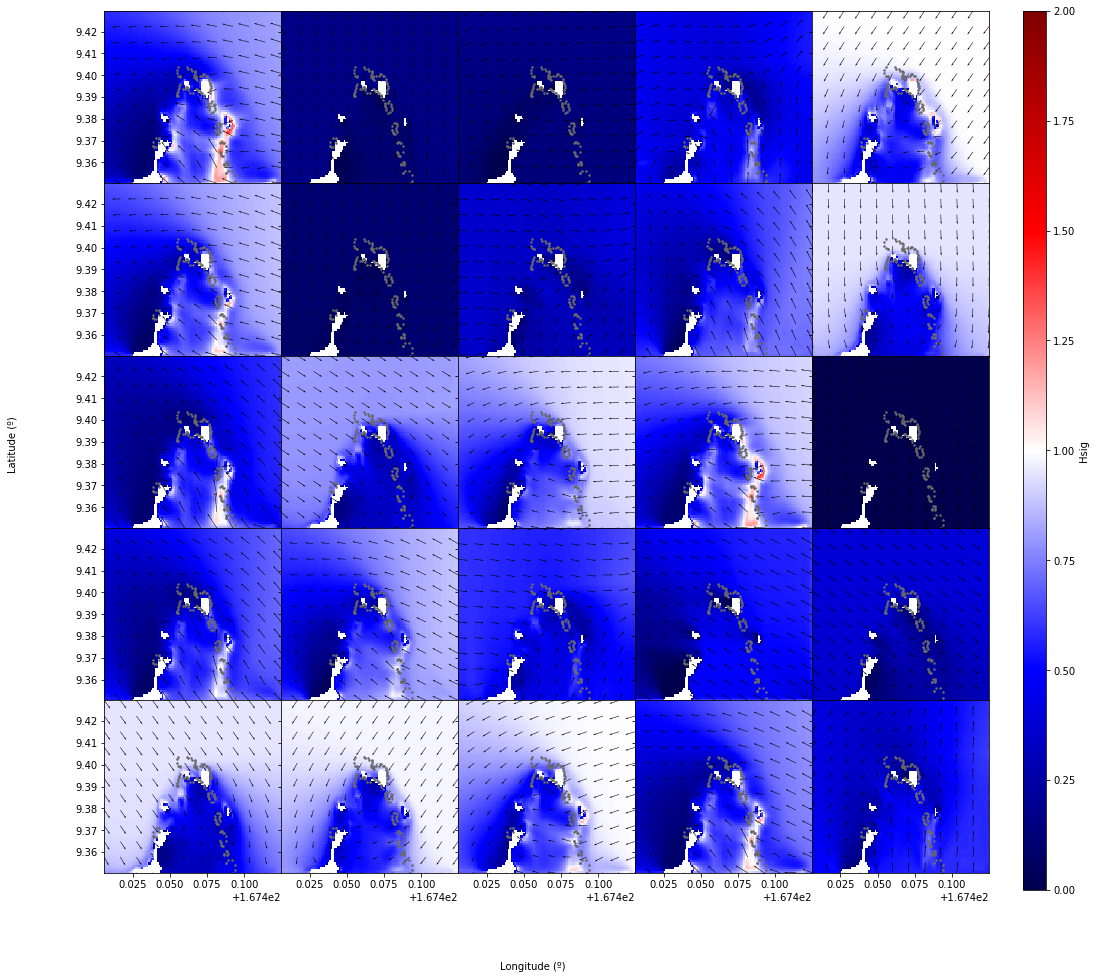

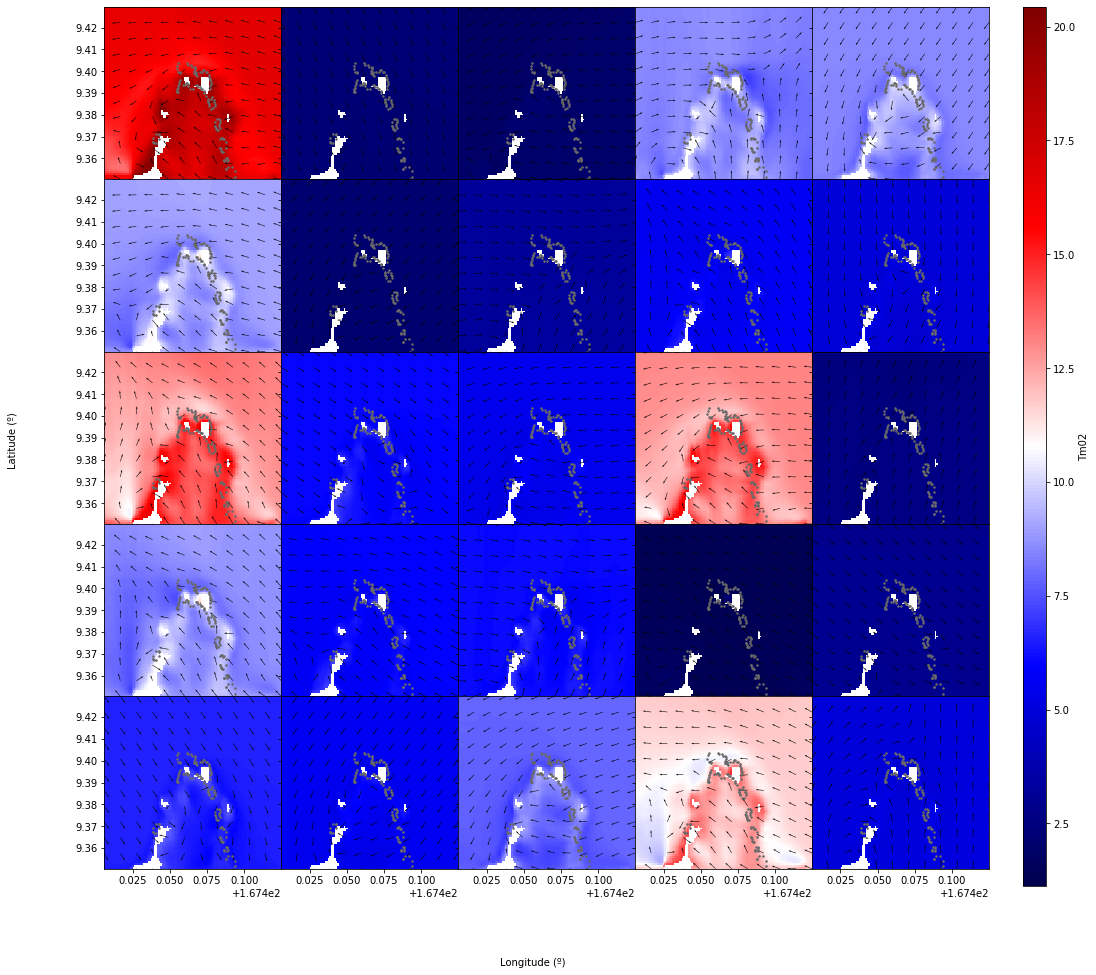

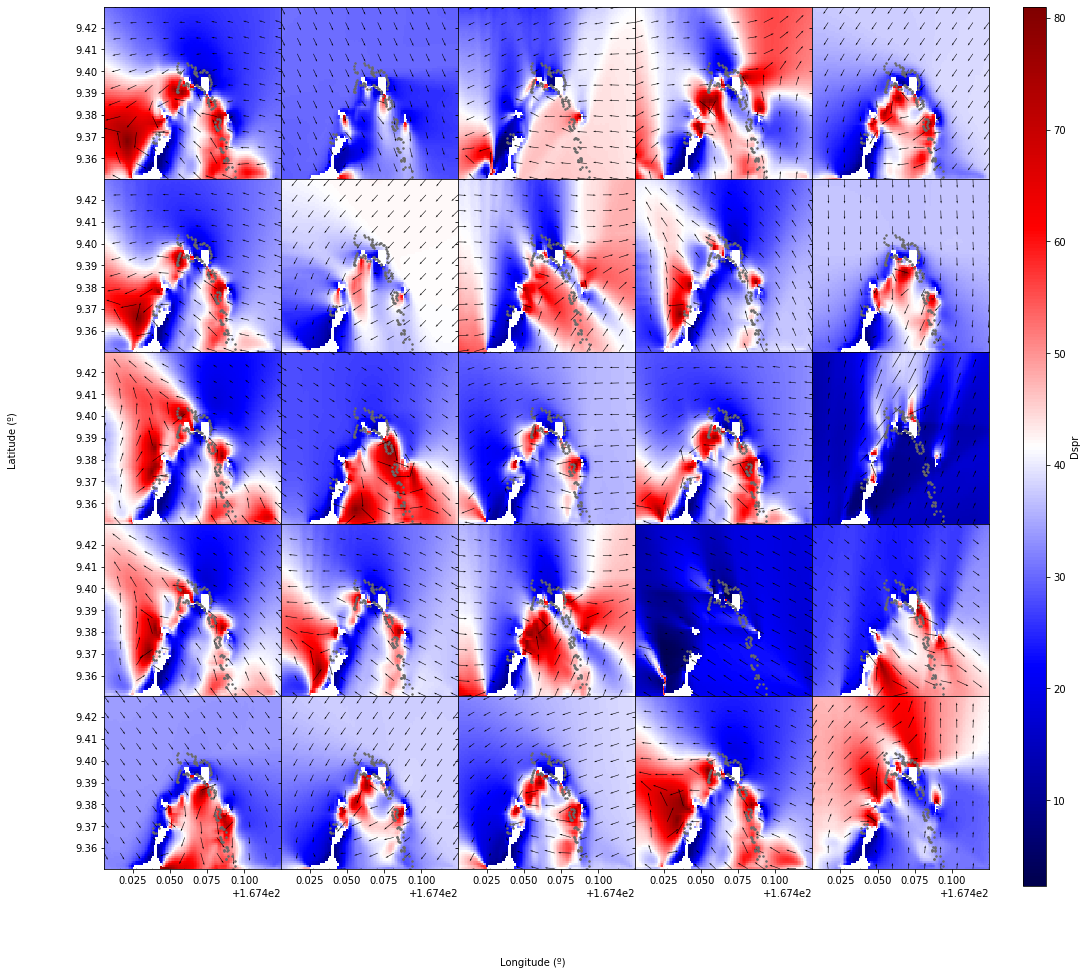

In [7]:
# extract output for nested mesh
out_sea_mn1_hist = sw.extract_output(mesh=sp.mesh_nest1)
out_sea_mn1_hist.to_netcdf(op.join(p_swan, 'out_nest1_sea.nc'))
print(out_sea_mn1_hist)

# plot scatter maps
scatter_maps(out_sea_mn1_hist, n_cases=25, var_limits={'Hsig':(0,2)}, np_shore=np_shore);



## SWAN: HISTORICAL SWELL waves 

In [8]:
# load Historical sea MDA subset
wvs_swell_subset = db_hist.Load('swl_subset')


# waves data hs and spr
wvs_swell_subset['hs'] = 1
wvs_swell_subset['spr'] = 10
wvs_swell_subset.rename(columns={'tp':'per'}, inplace=True)  # rename Tp for swan wrapper


# swan project
p_swan = db_hist.paths['swan_projects']
sp = SwanProject(p_swan, 'swell')


# main mesh: depth and computational grid 
sp.mesh_main.dg = main_grid.copy()
sp.mesh_main.cg = main_grid.copy()
sp.mesh_main.depth = np.loadtxt(p_swan_ext)

# nested mesh: depth and computational grid 
sp.mesh_nest1.dg = nested_grid.copy()
sp.mesh_nest1.cg = nested_grid.copy()
sp.mesh_nest1.depth = np.loadtxt(p_swan_int)

# activate nested mesh
sp.run_nest1 = True


# SWAN parameters 
sp.params = {
    'sea_level': 0,
    'jonswap_gamma': 10,
    'coords_spherical': 'CCM',
    'waves_period': 'PEAK',
    'nested_bounds': 'CLOSED',
}

    
# SWAN project wrapper
sw = SwanWrap_STAT(sp)

# build and launch cases
sw.build_cases(wvs_swell_subset)
sw.run_cases()


SWAN CASE: 0000 ---> hs    1.00, per   22.59, dir  359.75, spr   10.00
SWAN CASE: 0001 ---> hs    1.00, per    2.02, dir  212.07, spr   10.00
SWAN CASE: 0002 ---> hs    1.00, per    4.57, dir   48.76, spr   10.00
SWAN CASE: 0003 ---> hs    1.00, per   19.30, dir  216.22, spr   10.00
SWAN CASE: 0004 ---> hs    1.00, per   10.37, dir  303.60, spr   10.00
SWAN CASE: 0005 ---> hs    1.00, per   17.13, dir   97.27, spr   10.00
SWAN CASE: 0006 ---> hs    1.00, per    7.99, dir  133.89, spr   10.00
SWAN CASE: 0007 ---> hs    1.00, per   13.49, dir   21.29, spr   10.00
SWAN CASE: 0008 ---> hs    1.00, per   10.62, dir  214.19, spr   10.00
SWAN CASE: 0009 ---> hs    1.00, per    2.86, dir  337.90, spr   10.00
SWAN CASE: 0010 ---> hs    1.00, per   18.22, dir  299.39, spr   10.00
SWAN CASE: 0011 ---> hs    1.00, per    3.81, dir  274.05, spr   10.00
SWAN CASE: 0012 ---> hs    1.00, per   10.60, dir   77.91, spr   10.00
SWAN CASE: 0013 ---> hs    1.00, per    8.54, dir  353.02, spr   10.00
SWAN C

SWAN CASE: 0120 ---> hs    1.00, per   14.94, dir  213.38, spr   10.00
SWAN CASE: 0121 ---> hs    1.00, per   22.03, dir  329.82, spr   10.00
SWAN CASE: 0122 ---> hs    1.00, per   15.92, dir  347.40, spr   10.00
SWAN CASE: 0123 ---> hs    1.00, per    3.29, dir  224.12, spr   10.00
SWAN CASE: 0124 ---> hs    1.00, per   12.74, dir  262.82, spr   10.00
SWAN CASE: 0000 SOLVED
SWAN CASE: 0001 SOLVED
SWAN CASE: 0002 SOLVED
SWAN CASE: 0003 SOLVED
SWAN CASE: 0004 SOLVED
SWAN CASE: 0005 SOLVED
SWAN CASE: 0006 SOLVED
SWAN CASE: 0007 SOLVED
SWAN CASE: 0008 SOLVED
SWAN CASE: 0009 SOLVED
SWAN CASE: 0010 SOLVED
SWAN CASE: 0011 SOLVED
SWAN CASE: 0012 SOLVED
SWAN CASE: 0013 SOLVED
SWAN CASE: 0014 SOLVED
SWAN CASE: 0015 SOLVED
SWAN CASE: 0016 SOLVED
SWAN CASE: 0017 SOLVED
SWAN CASE: 0018 SOLVED
SWAN CASE: 0019 SOLVED
SWAN CASE: 0020 SOLVED
SWAN CASE: 0021 SOLVED
SWAN CASE: 0022 SOLVED
SWAN CASE: 0023 SOLVED
SWAN CASE: 0024 SOLVED
SWAN CASE: 0025 SOLVED
SWAN CASE: 0026 SOLVED
SWAN CASE: 0027 SOLVED
S

<xarray.Dataset>
Dimensions:  (case: 125, lat: 118, lon: 137)
Coordinates:
  * lat      (lat) float64 8.411 8.42 8.43 8.44 8.45 ... 9.546 9.556 9.566 9.576
  * lon      (lon) float64 166.6 166.6 166.6 166.6 ... 167.9 168.0 168.0 168.0
Dimensions without coordinates: case
Data variables:
    Hsig     (case, lon, lat) float32 0.95135117 0.9534373 ... 0.84441566
    Tm02     (case, lon, lat) float32 19.15772 19.1594 ... 10.985029 10.969408
    Dir      (case, lon, lat) float32 359.9416 0.053344727 ... 264.3469
    Dspr     (case, lon, lat) float32 14.191385 14.359759 ... 16.555916 16.4806
    TPsmoo   (case, lon, lat) float32 22.110985 22.110529 ... 12.825625


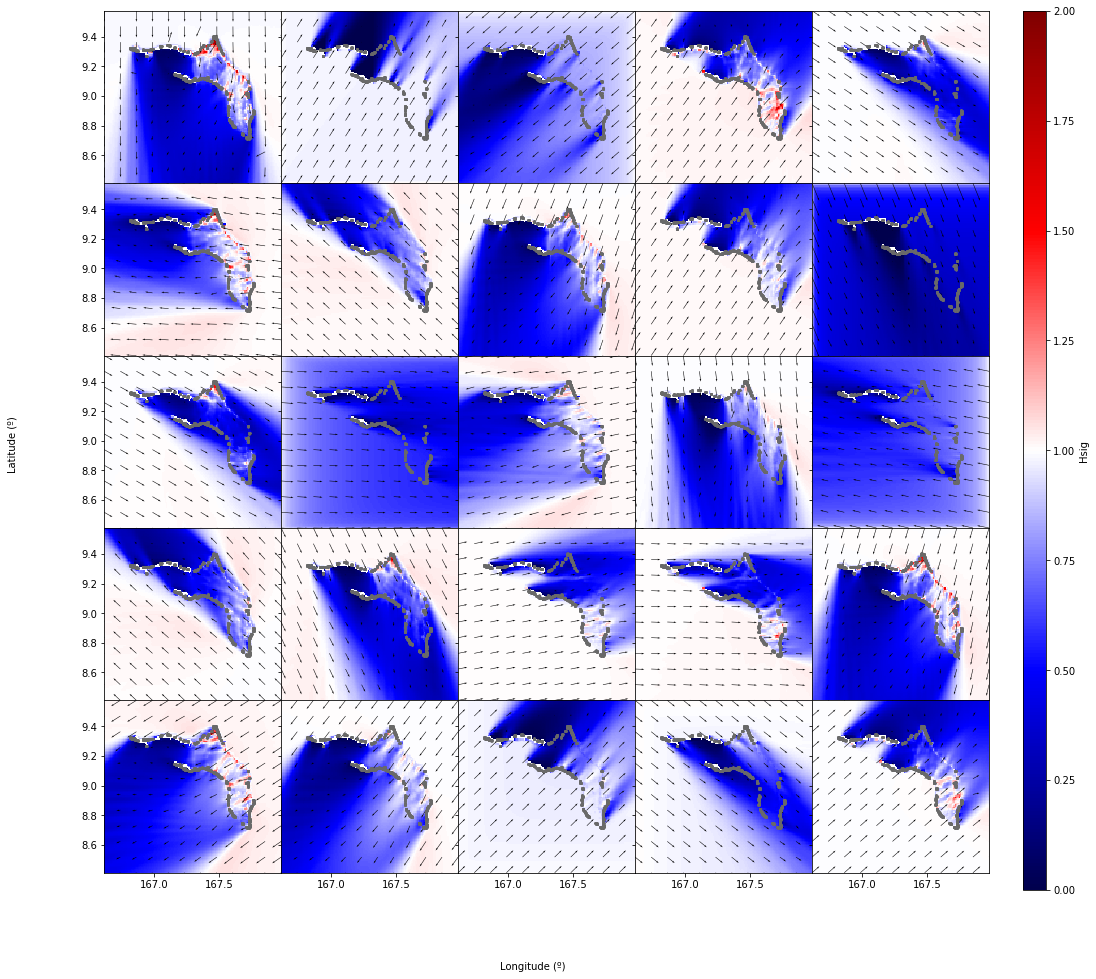

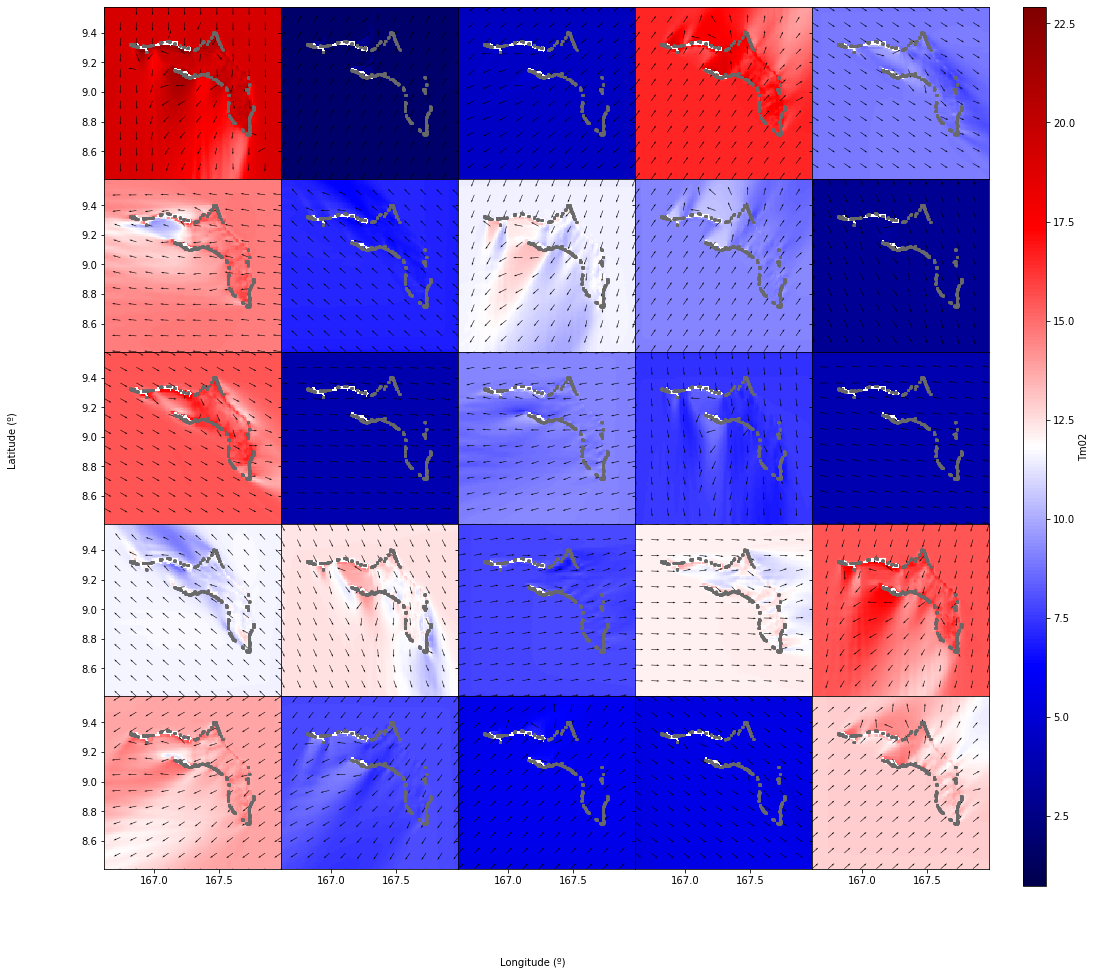

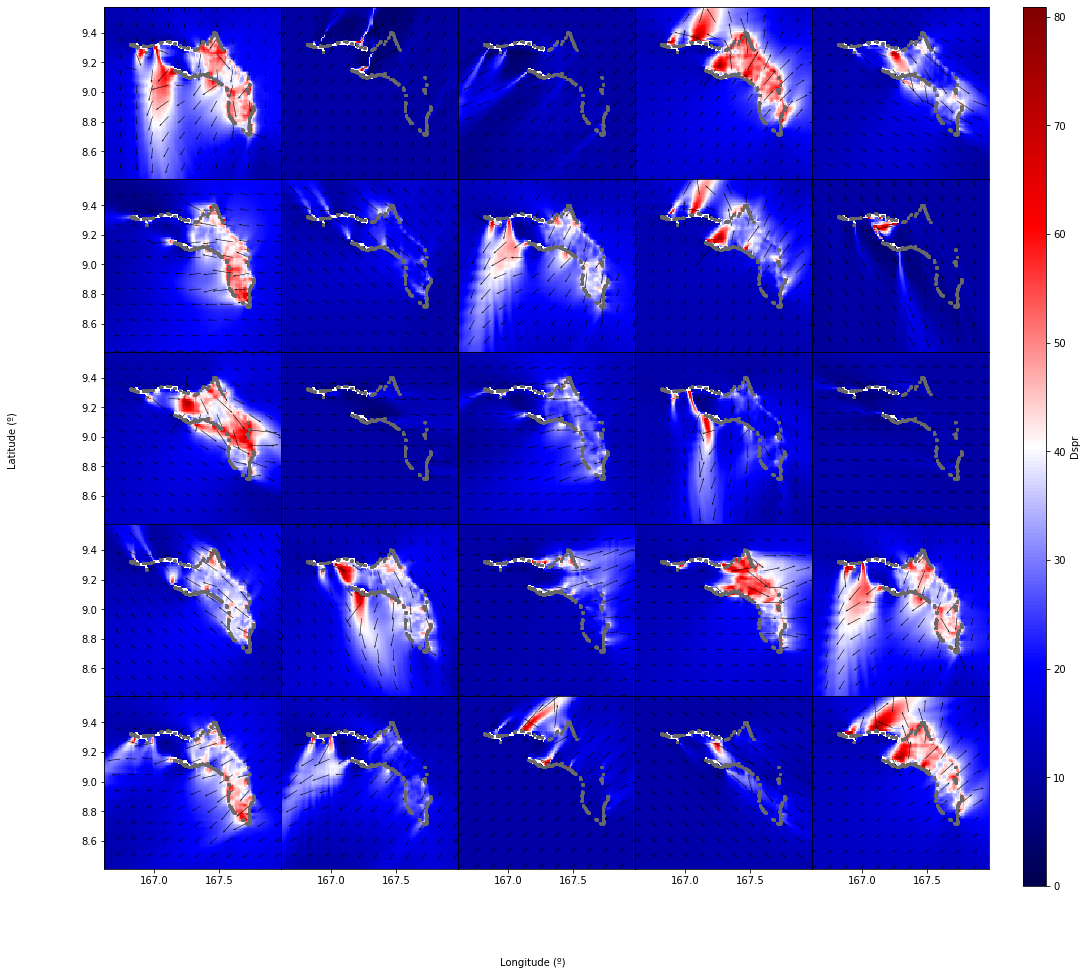

In [9]:
# extract output for main mesh
out_swl_mm_hist = sw.extract_output()
out_swl_mm_hist.to_netcdf(op.join(p_swan, 'out_main_swl.nc'))
print(out_swl_mm_hist)

# plot scatter maps
scatter_maps(out_swl_mm_hist, n_cases=25, var_limits={'Hsig':(0,2)}, np_shore=np_shore);


<xarray.Dataset>
Dimensions:  (case: 125, lat: 80, lon: 120)
Coordinates:
  * lat      (lat) float64 9.351 9.351 9.353 9.354 ... 9.427 9.428 9.429 9.43
  * lon      (lon) float64 167.4 167.4 167.4 167.4 ... 167.5 167.5 167.5 167.5
Dimensions without coordinates: case
Data variables:
    Hsig     (case, lon, lat) float32 0.9400371 0.9127761 ... 0.47313148
    Tm02     (case, lon, lat) float32 19.61152 19.424294 ... 10.884689
    Dir      (case, lon, lat) float32 3.1409302 1.3945007 ... 268.8034 264.44583
    Dspr     (case, lon, lat) float32 23.87725 20.58835 ... 18.739067 13.474794
    TPsmoo   (case, lon, lat) float32 22.25064 22.221874 ... 12.83135 12.827058


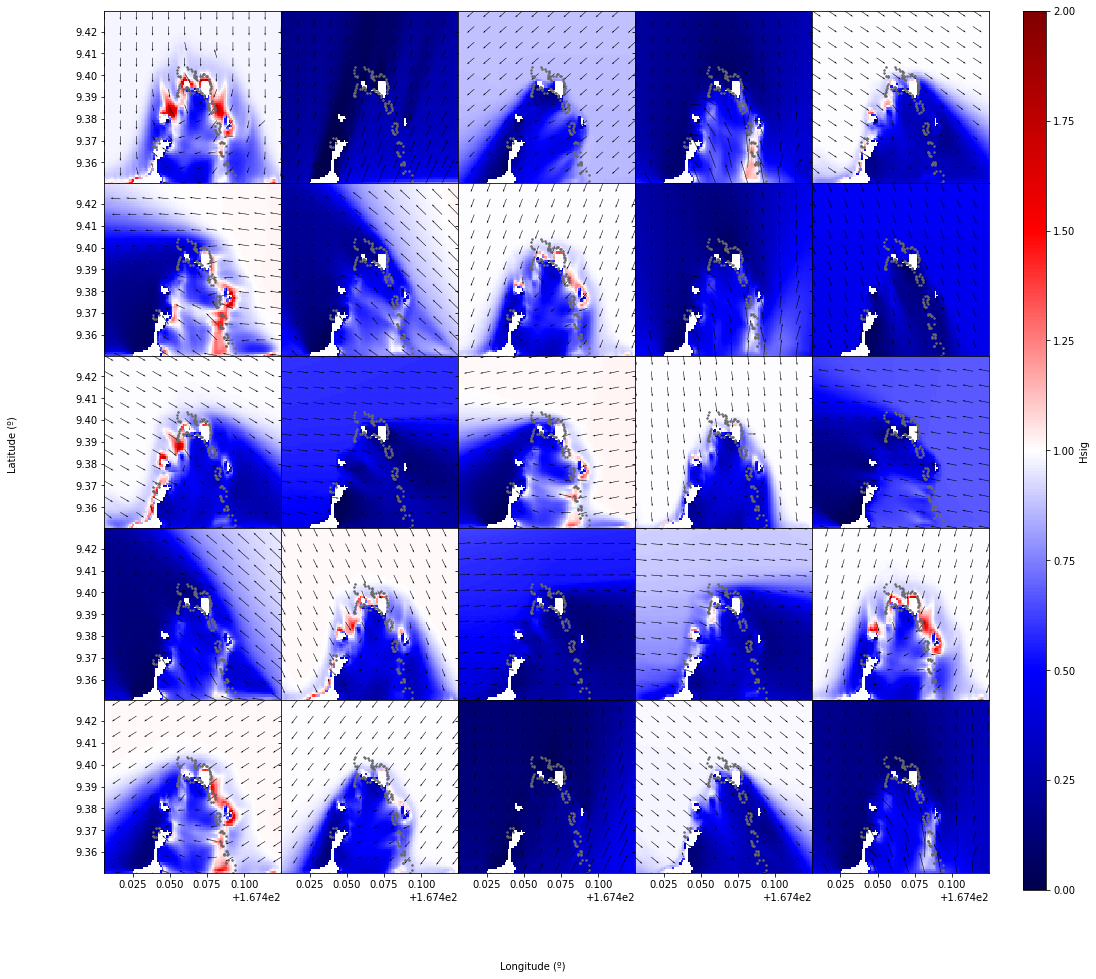

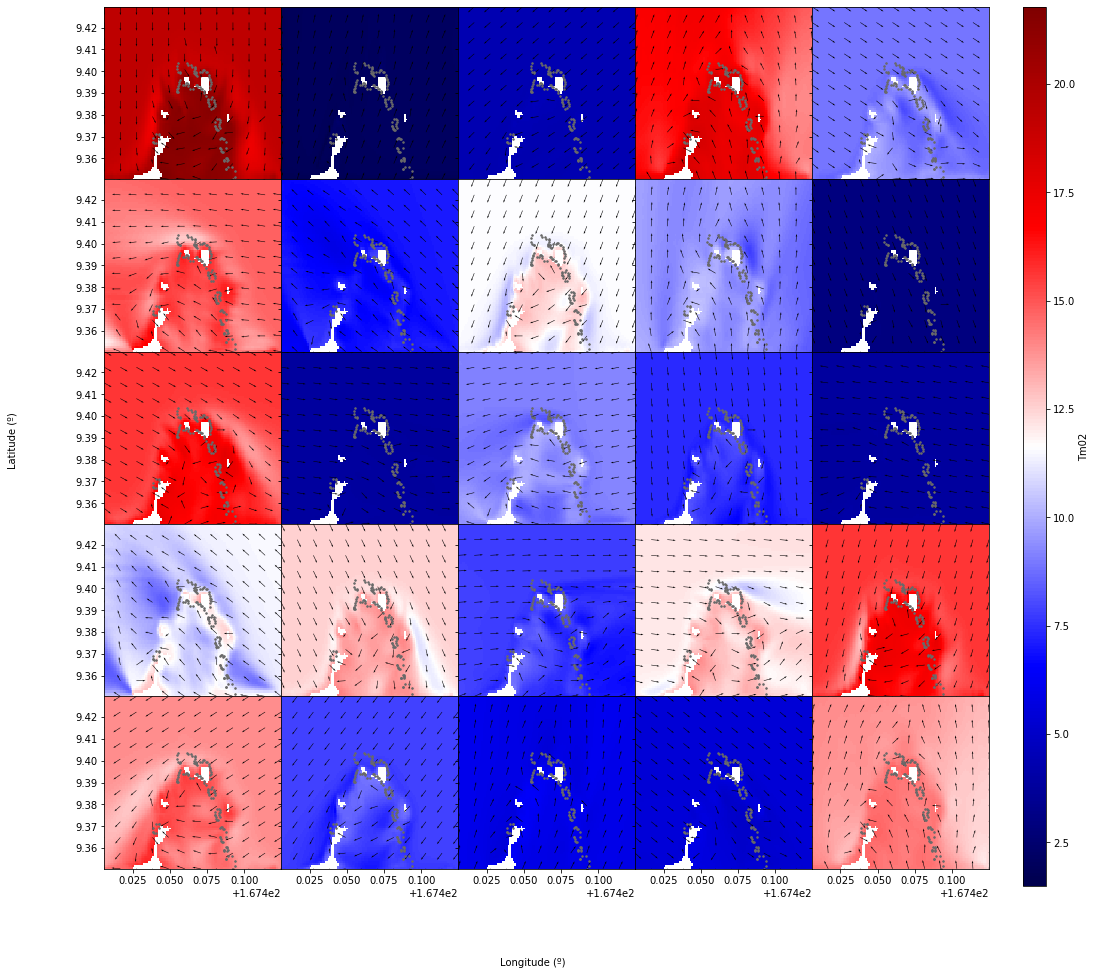

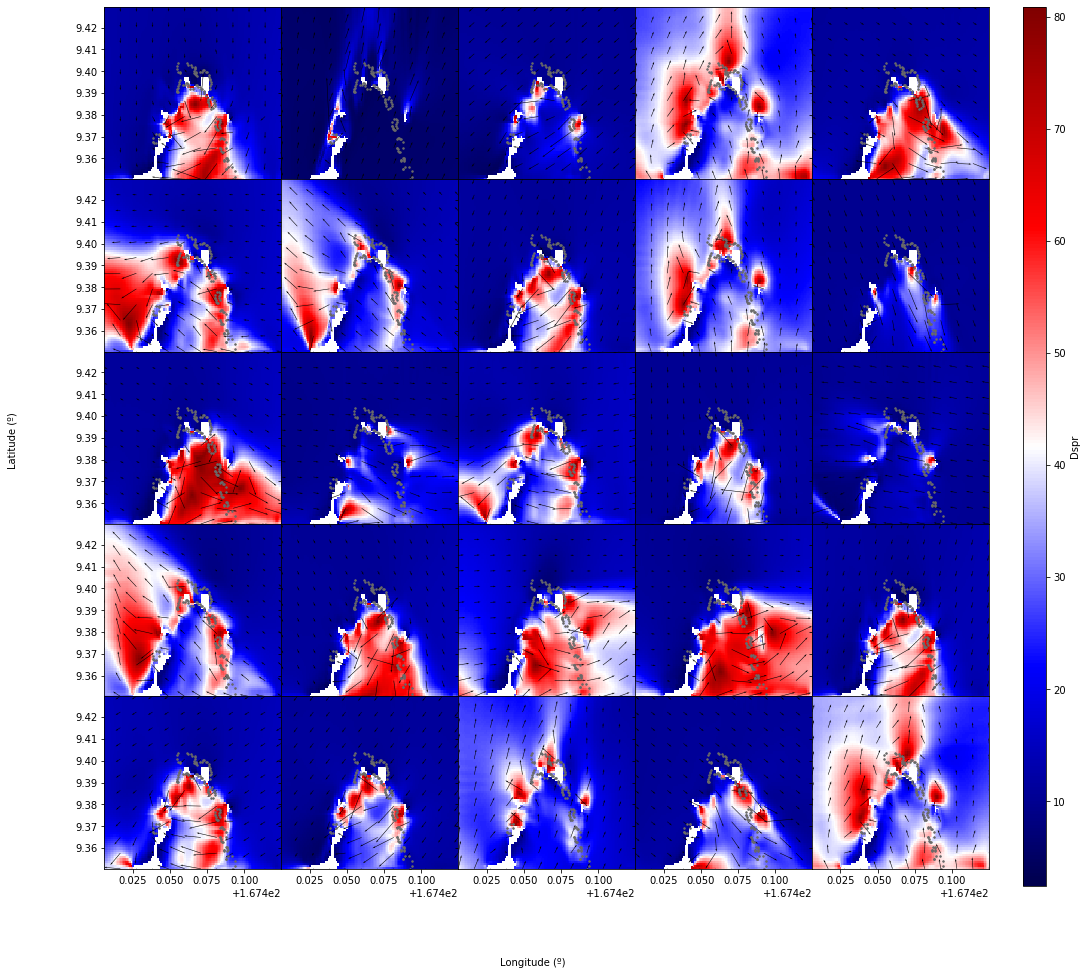

In [20]:
# extract output for nested mesh
out_swl_mn1_hist = sw.extract_output(mesh=sp.mesh_nest1)
out_swl_mn1_hist.to_netcdf(op.join(p_swan, 'out_nest1_swl.nc'))

print(out_swl_mn1_hist)

# plot scatter maps
scatter_maps(out_swl_mn1_hist, n_cases=25, var_limits={'Hsig':(0,2)}, np_shore=np_shore);



## RBF Reconstruction target: HISTORICAL Point SEA and SWELLs propagations

In [11]:
# point to reconstruct 
ix_lon, ix_lat = 62, 66

# Extract output waves at point (from nest1 mesh)
p1_sea = out_sea_mn1_hist.isel({'lon':ix_lon, 'lat':ix_lat}).to_dataframe()
p1_swl = out_swl_mn1_hist.isel({'lon':ix_lon, 'lat':ix_lat}).to_dataframe()

# store data
db_hist.Save('sea_target', p1_sea)
db_hist.Save('swl_target', p1_swl)
